In [65]:
import pandas as pd

df1=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\ProductA.xlsx')
df2=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\ProductA_google_clicks.xlsx')
df3=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\ProductA_fb_impressions.xlsx')

new_df1=pd.merge(df1, df2, on='Day Index', how='left')

df=pd.merge(new_df1, df3, on='Day Index', how='left')# datset combining all 3 datasets

df.head() 

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


In [66]:
df.head()
print()
print()
df.info()
print()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB



,Day Index,Quantity,Clicks,Impressions
count,212,212.000000,212.00000,212.000000
mean,2022-03-16 12:00:00,17.542453,358.20283,1531.702830
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000
75%,2022-05-08 06:00:00,21.000000,492.75000,1862.000000
max,2022-06-30 00:00:00,38.000000,726.00000,2707.000000
std,NaN,5.790423,164.52160,440.660783


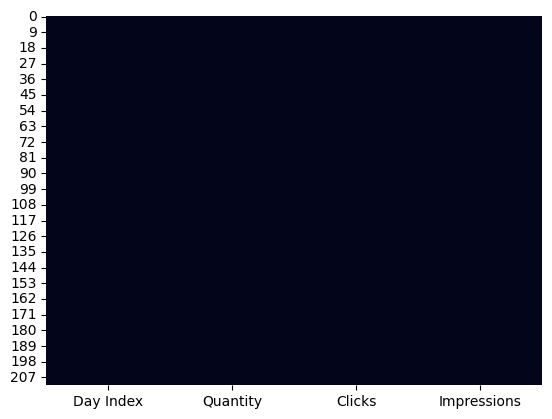

<Figure size 1200x600 with 0 Axes>

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.figure(figsize=(12, 6))
plt.show() # The below figure indicates that there are no null values in the dataset

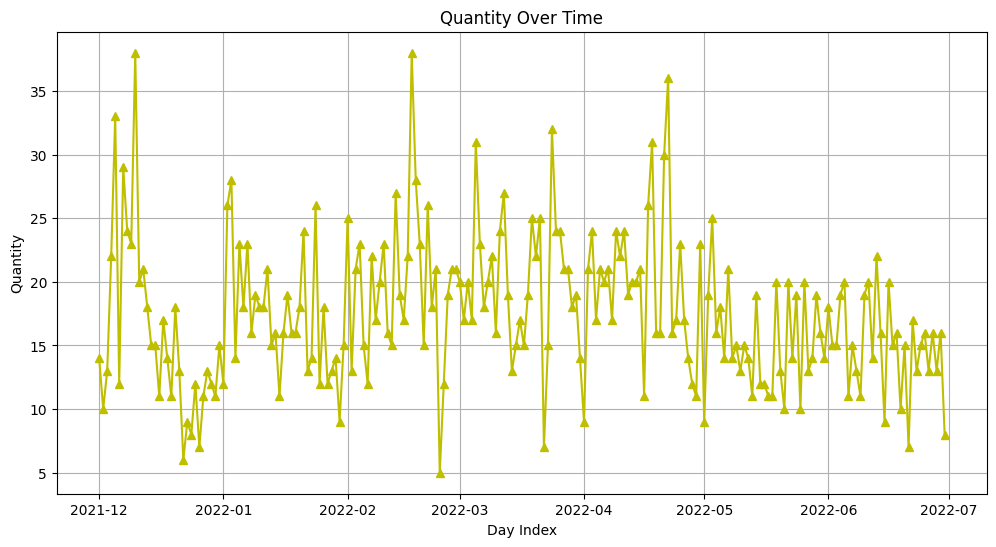

In [68]:
df['Day Index'] = pd.to_datetime(df['Day Index']) #converting into datetimeformat

plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='^', linestyle='-', color='y')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.title('Quantity Over Time')
plt.grid(True)
plt.show()   

In [69]:
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

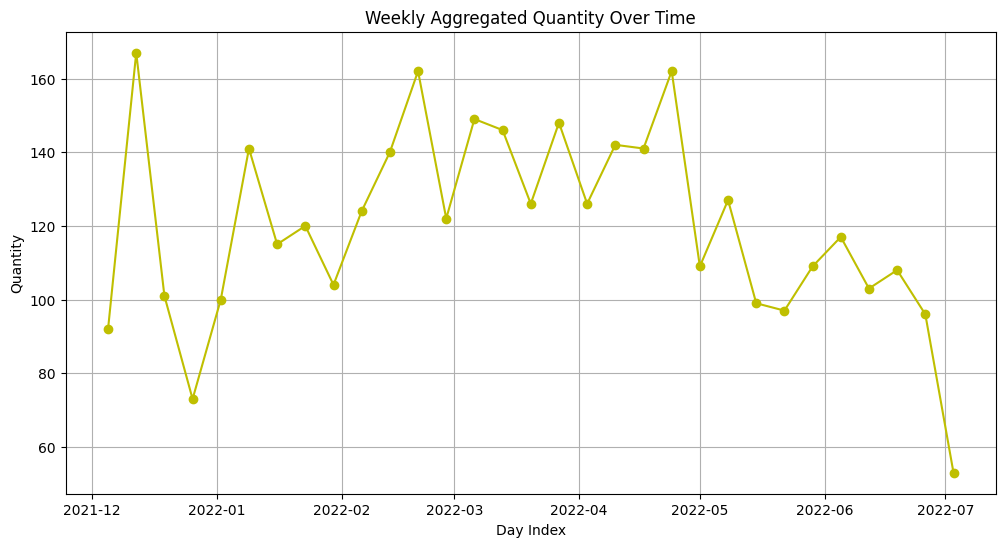

In [70]:
#plotting weekly

df.set_index('Day Index', inplace=True) # keeping date as the index for resampling

df_weekly = df['Quantity'].resample('W').sum() # Resampling data to weekly and aggregating quantity

plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values, marker='o', linestyle='-', color='y')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.title('Weekly Aggregated Quantity Over Time')
plt.grid(True)
plt.show()

You can see that , in the months of december , february and april , the noof products sold is high

In [80]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

In [72]:
df.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


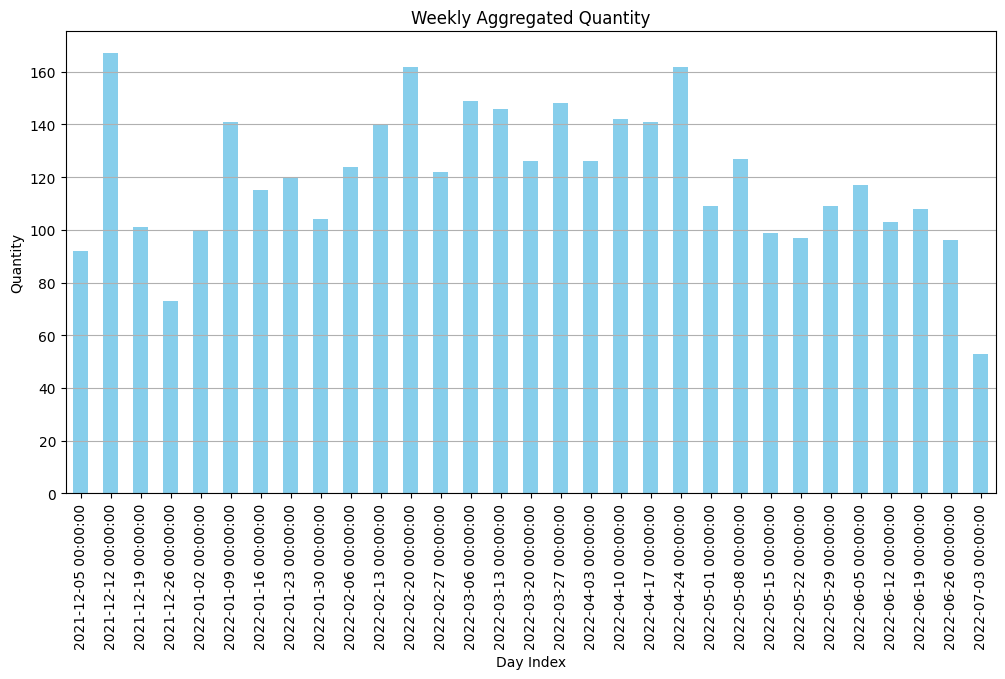

In [73]:
# Barplot

plt.figure(figsize=(12, 6))
df_weekly.plot(kind='bar', color='skyblue')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.title('Weekly Aggregated Quantity')
plt.grid(axis='y')
plt.show()

Well this one is more clear . So , you can see that in second weeks of December and april , and in third week of february , we have more sold outs.

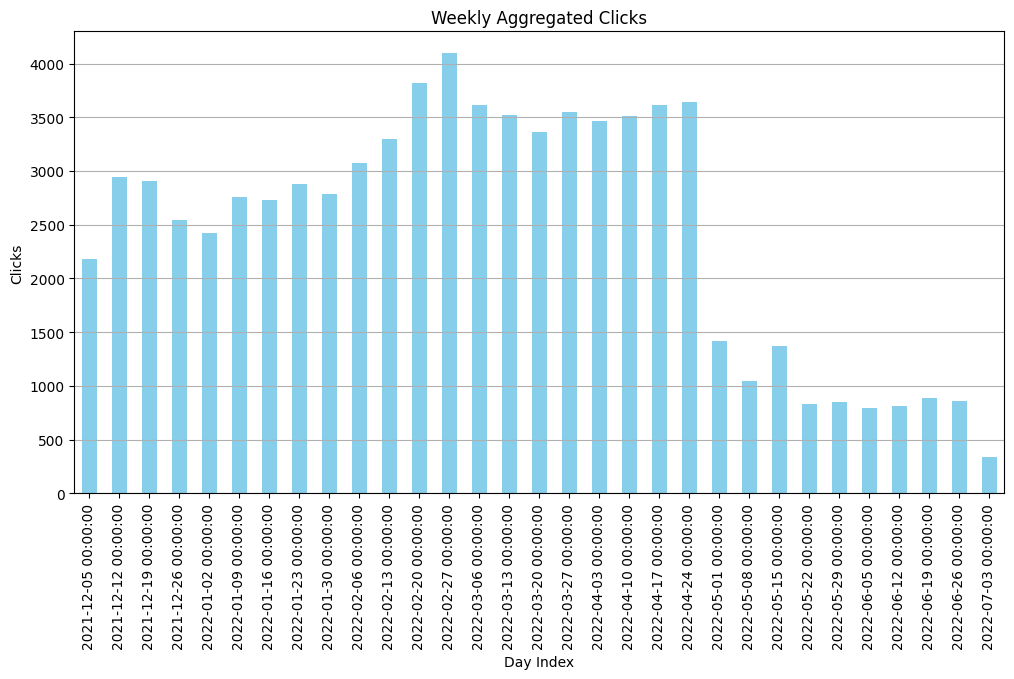

In [74]:
df.set_index('Day Index', inplace=True) # keeping date as the index for resampling

df_weekly = df['Clicks'].resample('W').sum() # Resampling data to weekly and aggregating clicks

plt.figure(figsize=(12, 6))
df_weekly.plot(kind='bar', color='skyblue')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.title('Weekly Aggregated Clicks')
plt.grid(axis='y')
plt.show()

We can see that from May month , the clicks have been drastically decreased.

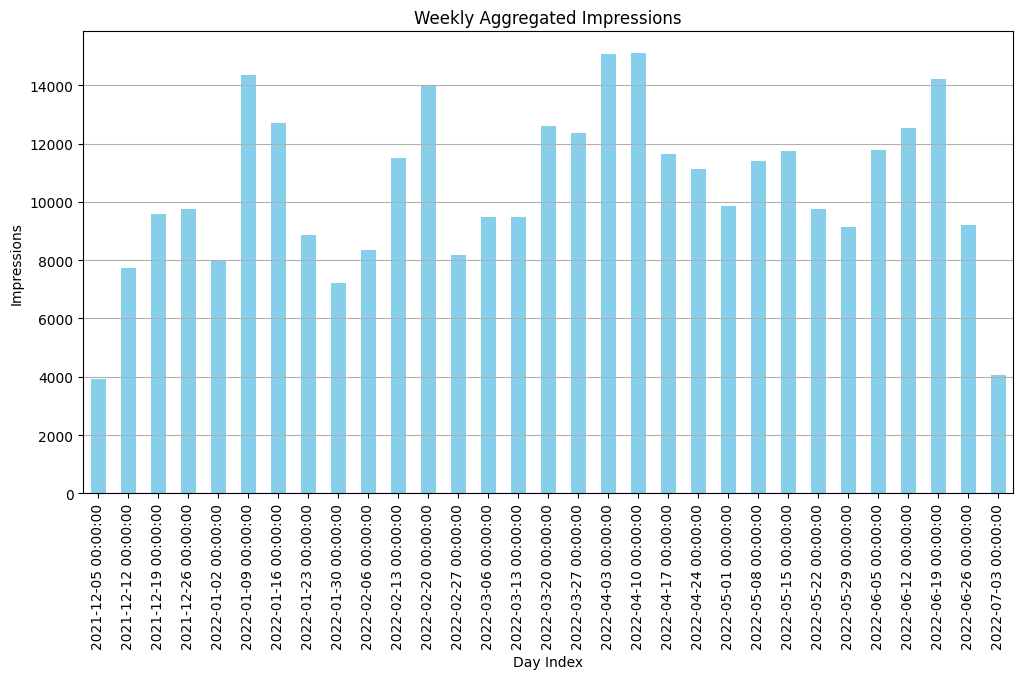

In [77]:
df.set_index('Day Index', inplace=True) # keeping date as the index for resampling

df_weekly = df['Impressions'].resample('W').sum() # Resampling data to weekly and aggregating impressions

plt.figure(figsize=(12, 6))
df_weekly.plot(kind='bar', color='skyblue')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.title('Weekly Aggregated Impressions')
plt.grid(axis='y')
plt.show()

Correlation matrix:
              Quantity    Clicks  Impressions
Quantity     1.000000  0.666932     0.460122
Clicks       0.666932  1.000000     0.200396
Impressions  0.460122  0.200396     1.000000


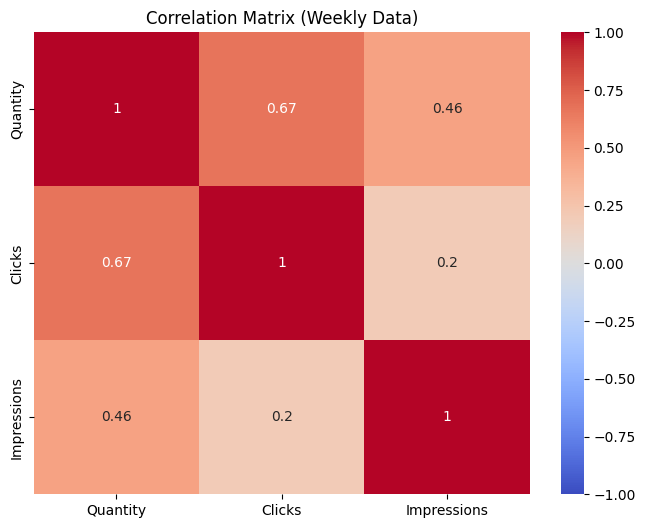

In [81]:
#Correlation Matrix

df.set_index('Day Index', inplace=True)

# Resample data to weekly frequency and aggregate using sum
df_weekly = df.resample('W').sum()

# Check correlation between columns
correlation = df_weekly.corr()
print("Correlation matrix:\n", correlation)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Weekly Data)')
plt.show()


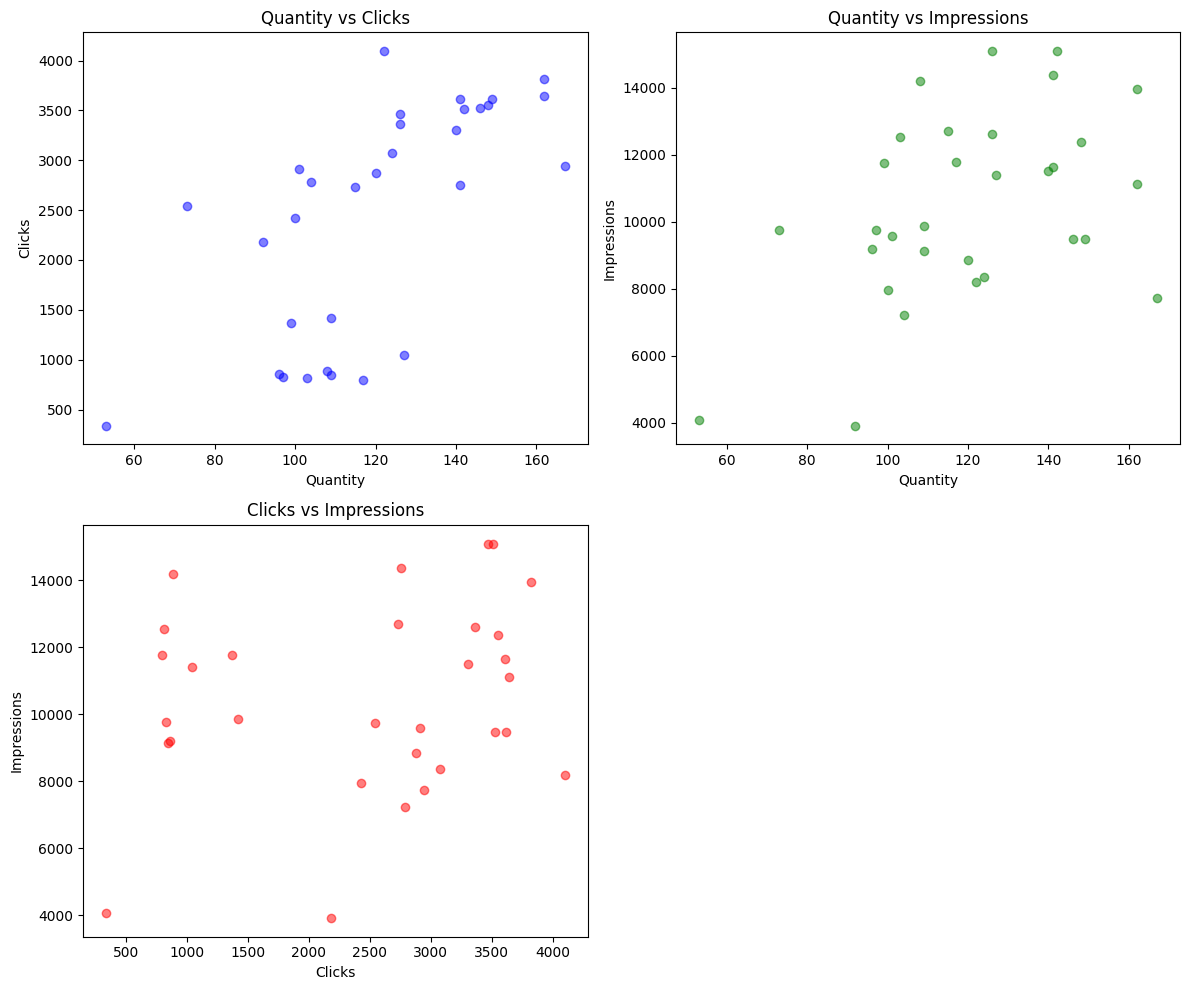

In [82]:
# Scatter plots to visually examine relationships
plt.figure(figsize=(12, 10))

# Scatter plot: Quantity vs Clicks
plt.subplot(2, 2, 1)
plt.scatter(df_weekly['Quantity'], df_weekly['Clicks'], color='blue', alpha=0.5)
plt.title('Quantity vs Clicks')
plt.xlabel('Quantity')
plt.ylabel('Clicks')

# Scatter plot: Quantity vs Impressions
plt.subplot(2, 2, 2)
plt.scatter(df_weekly['Quantity'], df_weekly['Impressions'], color='green', alpha=0.5)
plt.title('Quantity vs Impressions')
plt.xlabel('Quantity')
plt.ylabel('Impressions')

# Scatter plot: Clicks vs Impressions
plt.subplot(2, 2, 3)
plt.scatter(df_weekly['Clicks'], df_weekly['Impressions'], color='red', alpha=0.5)
plt.title('Clicks vs Impressions')
plt.xlabel('Clicks')
plt.ylabel('Impressions')

plt.tight_layout()
plt.show()
